## Bring in libraries and dataframes and set indexes

In [19]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
import ETFunctions as et

Lattitude = -43.38
LongitudeTZ = 185
LongitudeML = 360 - 172.28

Path = 'K:\CPDiary\Data\BaxtersMVI'

## Bring in fresh data from Low zone and join to existing data

In [20]:
#Get the data that has already been indexed
ExistingLWCZoneData = pd.read_pickle(Path + '\LoggedData\DataFrames\LowWHCZoneAll.pkl')

#read in the fresh data
StartRead = ExistingLWCZoneData.index.size + 4 - 7
Skips = [0,2,3] + list(range(4,StartRead))

#Get Fresh Data 
FreshLowWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersLowWHCZone.dat', 
                            skiprows = Skips, index_col = 0, na_values='NAN')

#join fresh data with exisiting data 
FreshLowWHCZoneData.columns = ExistingLWCZoneData.columns
LowWHCZoneAll = ExistingLWCZoneData.append(FreshLowWHCZoneData)

LowWHCZoneAll.to_pickle('K:\CPDiary\Data\BaxtersMVI\LoggedData\DataFrames\LowWHCZoneAll.pkl')
#Set up other data frames
LowMetData = LowWHCZoneAll.ix[7:,['AirTemp','RelativeHumidity','Rain']].copy()
LowMetData.columns = LowMetData.columns.droplevel([1,2,3])
LowMetData.index = LowMetData.index.to_datetime()
LowWHCZoneTs = LowWHCZoneAll.ix[7:,LowWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
LowWHCZoneTs.columns = LowWHCZoneTs.columns.droplevel(0)
LowWHCZoneTb = LowWHCZoneAll.ix[7:,LowWHCZoneAll.ix['Measurement',:]=='IR_SensorBodyTemp'].copy()
LowWHCZoneTb.columns = LowWHCZoneTb.columns.droplevel(0)
LowWHCZoneBattery = LowWHCZoneAll.ix[:,'BatteryVoltage']

## Bring in fresh data from Mid zone and join to existing data

In [21]:
#Get the data that has already been indexed
ExistingMWCZoneData = pd.read_pickle(Path + '\LoggedData\DataFrames\MidWHCZoneAll.pkl')

#read in the fresh data
StartRead = ExistingMWCZoneData.index.size + 4 - 7
Skips = [0,2,3] + list(range(4,StartRead))

#Get Fresh Data 
FreshMidWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersMidWHCZone.dat', 
                            skiprows = Skips, index_col = 0, na_values='NAN')

#join fresh data with exisiting data 
FreshMidWHCZoneData.columns = ExistingMWCZoneData.columns
MidWHCZoneAll = ExistingMWCZoneData.append(FreshMidWHCZoneData)

MidWHCZoneAll.to_pickle('K:\CPDiary\Data\BaxtersMVI\LoggedData\DataFrames\MidWHCZoneAll.pkl')
#Set up other data frames
MidMetData = MidWHCZoneAll.ix[7:,['AirTemp','RelativeHumidity','RadnMJ','RadnkW','Rain']].copy()
MidMetData.columns = MidMetData.columns.droplevel([1,2,3])
MidMetData.index = MidMetData.index.to_datetime()
MidMetData = MidMetData.convert_objects()
MidMetData.ix[:,'Es'] = [et.saturated_vapor_pressure(MidMetData.ix[x,'AirTemp'])/10 for x in MidMetData.index]
MidMetData.ix[:,'Eo'] = [MidMetData.ix[x,'Es'] * MidMetData.ix[x,'RelativeHumidity']/100 for x in MidMetData.index]
#Repair radiation data where incorrect coefficients were used
MidMetData.loc[:'2017-10-25 07:20:00','RadnkW'] = MidMetData.loc[:'2017-10-25 07:20:00','RadnkW'].divide(1000)
MidMetData.loc[:'2017-10-25 07:20:00','RadnMJ'] = MidMetData.loc[:'2017-10-25 07:20:00','RadnkW'].multiply(0.3)
MidWHCZoneTs = MidWHCZoneAll.ix[7:,MidWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
MidWHCZoneTs.columns = MidWHCZoneTs.columns.droplevel(0)
MidWHCZoneTb = MidWHCZoneAll.ix[7:,MidWHCZoneAll.ix['Measurement',:]=='IR_SensorBodyTemp'].copy()
MidWHCZoneTb.columns = MidWHCZoneTb.columns.droplevel(0)
MidWHCZoneBattery = MidWHCZoneAll.ix[:,'BatteryVoltage']

C:\Users\cflhxb\AppData\Roaming\Python\Python27\site-packages\ipykernel\__main__.py:21: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## Bring in fresh data from High zone and join to existing data

In [22]:
#Get the data that has already been indexed
ExistingHWCZoneData = pd.read_pickle(Path + '\LoggedData\DataFrames\HighWHCZoneAll.pkl')

#read in the fresh data
StartRead = ExistingHWCZoneData.index.size + 4 - 7
Skips = [0,2,3] + list(range(4,StartRead))

#Get Fresh Data 
FreshHighWHCZoneData=pd.read_csv(Path + '\LoggedData\BaxtersHighWHCZone.dat', 
                            skiprows = Skips, index_col = 0, na_values='NAN')

#join fresh data with exisiting data 
FreshHighWHCZoneData.columns = ExistingHWCZoneData.columns
HighWHCZoneAll = ExistingHWCZoneData.append(FreshHighWHCZoneData)

HighWHCZoneAll.to_pickle('K:\CPDiary\Data\BaxtersMVI\LoggedData\DataFrames\HighWHCZoneAll.pkl')
#Set up other data frames
HighMetData = HighWHCZoneAll.ix[7:,['AirTemp','RelativeHumidity','Rain']].copy()
HighMetData.columns = HighMetData.columns.droplevel([1,2,3])
HighMetData.index = HighMetData.index.to_datetime()
HighWHCZoneTs = HighWHCZoneAll.ix[7:,HighWHCZoneAll.ix['Measurement',:]=='IR_SurfaceTemp'].copy()
HighWHCZoneTs.columns = HighWHCZoneTs.columns.droplevel(0)
HighWHCZoneTb = HighWHCZoneAll.ix[7:,HighWHCZoneAll.ix['Measurement',:]=='IR_SensorBodyTemp'].copy()
HighWHCZoneTb.columns = HighWHCZoneTb.columns.droplevel(0)
HighWHCZoneBattery = HighWHCZoneAll.ix[:,'BatteryVoltage']

## Join stuff together 

In [23]:
#Join everything together and get the formats all right
Zones = ['Low','Mid','High']
Irrigs = ['STD','VRI']
Reps = [1,2,3,4]
colors = ['r','r','g','g','b','b']
lines = ['--','-','--','-','--','-']
ExptIndex = pd.MultiIndex.from_product([Zones, Irrigs, Reps], names = ['Zone', 'Irrig', 'Rep'])
SurfaceTemp = pd.DataFrame(index = LowWHCZoneTs.index, columns = ExptIndex)
SurfaceTemp.update(LowWHCZoneTs)
SurfaceTemp.update(MidWHCZoneTs)
SurfaceTemp.update(HighWHCZoneTs)
SurfaceTemp.index = SurfaceTemp.index.to_datetime()
SurfaceTemp.dropna(inplace=True)
for plot in SurfaceTemp.columns:
    SurfaceTemp.ix[:,plot] = pd.to_numeric(SurfaceTemp.ix[:,plot])
HourlySurfaceTemp = SurfaceTemp.resample('H').mean()
SurfaceTempMeans = HourlySurfaceTemp.groupby(level=['Zone','Irrig'],axis=1).mean()

SensorTemp = pd.DataFrame(index = LowWHCZoneTb.index, columns = ExptIndex)
SensorTemp.update(LowWHCZoneTb)
SensorTemp.update(MidWHCZoneTb)
SensorTemp.update(HighWHCZoneTb)
SensorTemp.index = SensorTemp.index.to_datetime()
SensorTemp.dropna(inplace=True)

BatteryVoltage = pd.DataFrame(index = LowWHCZoneBattery.index,columns = ['Low','Mid','High'])
BatteryVoltage.ix[:,'Low'] = LowWHCZoneBattery
BatteryVoltage.ix[:,'Mid'] = MidWHCZoneBattery
BatteryVoltage.ix[:,'High'] = HighWHCZoneBattery

Today = datetime.datetime.now().date()
Start = Today - timedelta(weeks=1)

## Check some status stuff

In [24]:
SensorTemp.index.max()

Timestamp('2017-10-26 07:00:00')

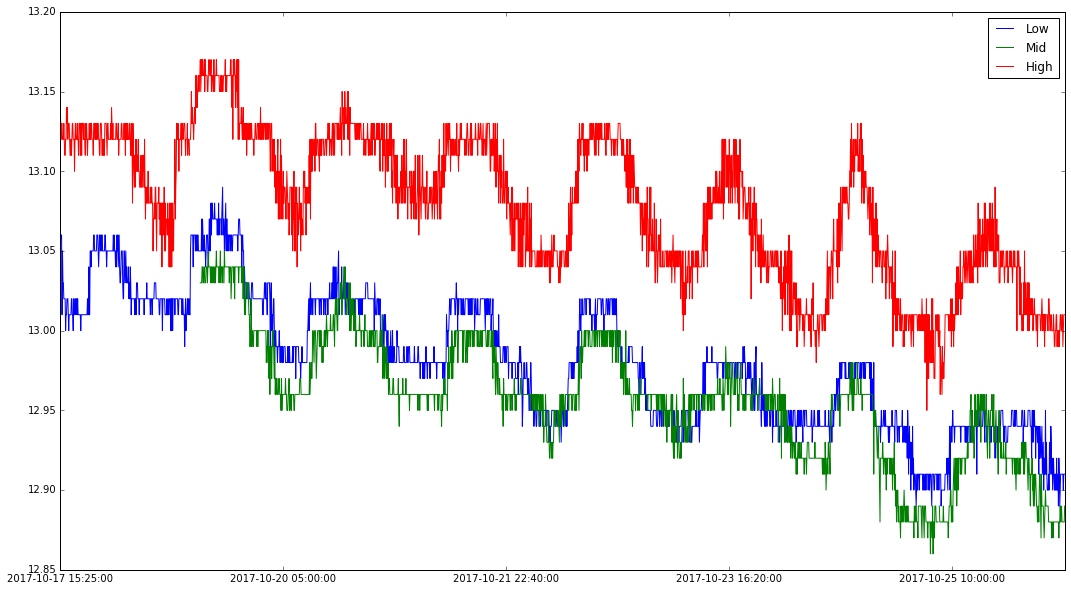

In [25]:
BatteryVoltage.ix[7:].plot(figsize=(18,10))

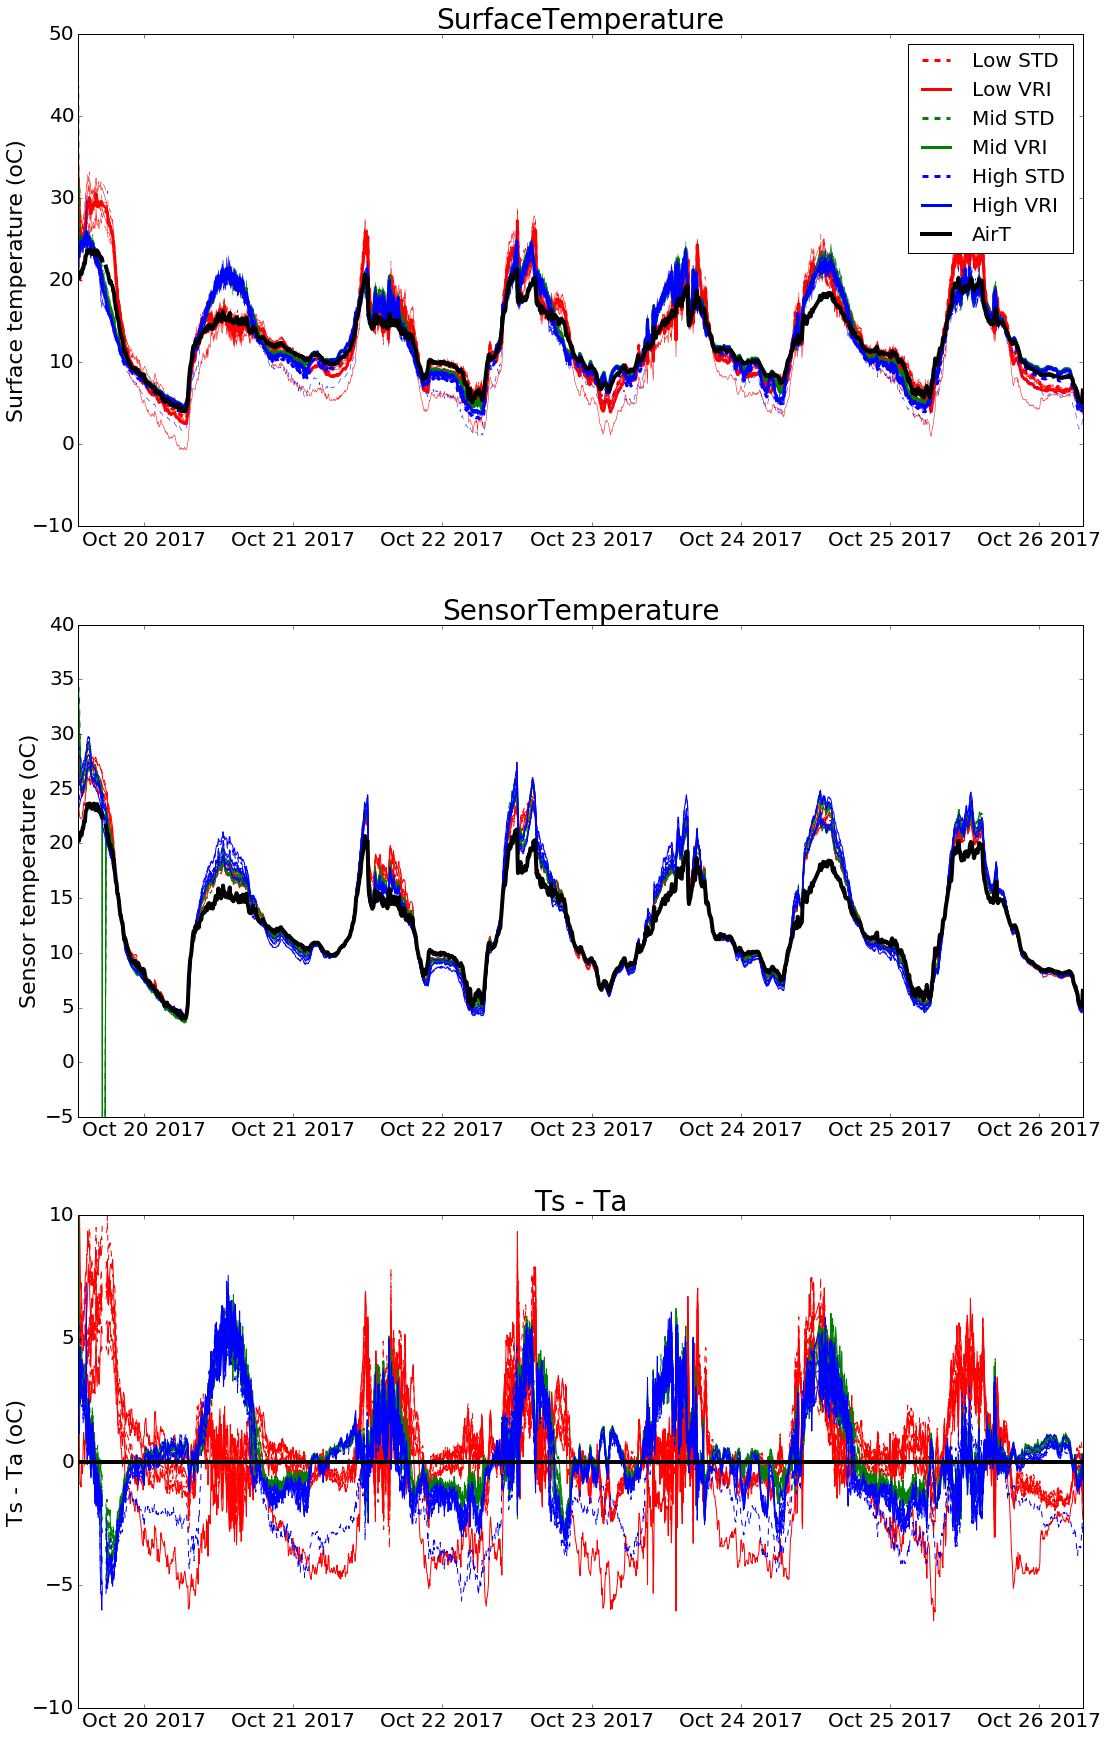

In [26]:
Graph = plt.figure(figsize=(18,30))
pos = 0
Fig = Graph.add_subplot(3,1,1)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = SurfaceTemp.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),lines[pos],color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot(MidMetData.ix[Start:,'AirTemp'],color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)
Graph.add_subplot(3,1,2)
pos = 0
for Zone in Zones:
    for Irr in Irrigs:
        data = SensorTemp.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos])
        pos +=1
plt.plot(MidMetData.ix[Start:,'AirTemp'],color='k',lw=4)
plt.ylim(-5,40)
plt.tick_params(labelsize=20)
plt.title('SensorTemperature',fontsize=28)
plt.ylabel('Sensor temperature (oC)',fontsize = 22)

Graph.add_subplot(3,1,3)
pos = 0
for Zone in Zones:
    for Irr in Irrigs:
        data = SurfaceTemp.ix[:,(Zone,Irr)].sub(MidMetData.ix[Start:,'AirTemp'],axis=0)
        plt.plot(data,lines[pos],color = colors[pos])
        pos +=1
plt.plot([MidMetData.ix[Start:,'AirTemp'].index.min(),MidMetData.index.max()],[0,0],color='k',lw=4,label='AirT')
plt.ylim(-10,10)
plt.tick_params(labelsize=20)
plt.title('Ts - Ta',fontsize=28)
plt.ylabel('Ts - Ta (oC)',fontsize = 22)

(0, 10)

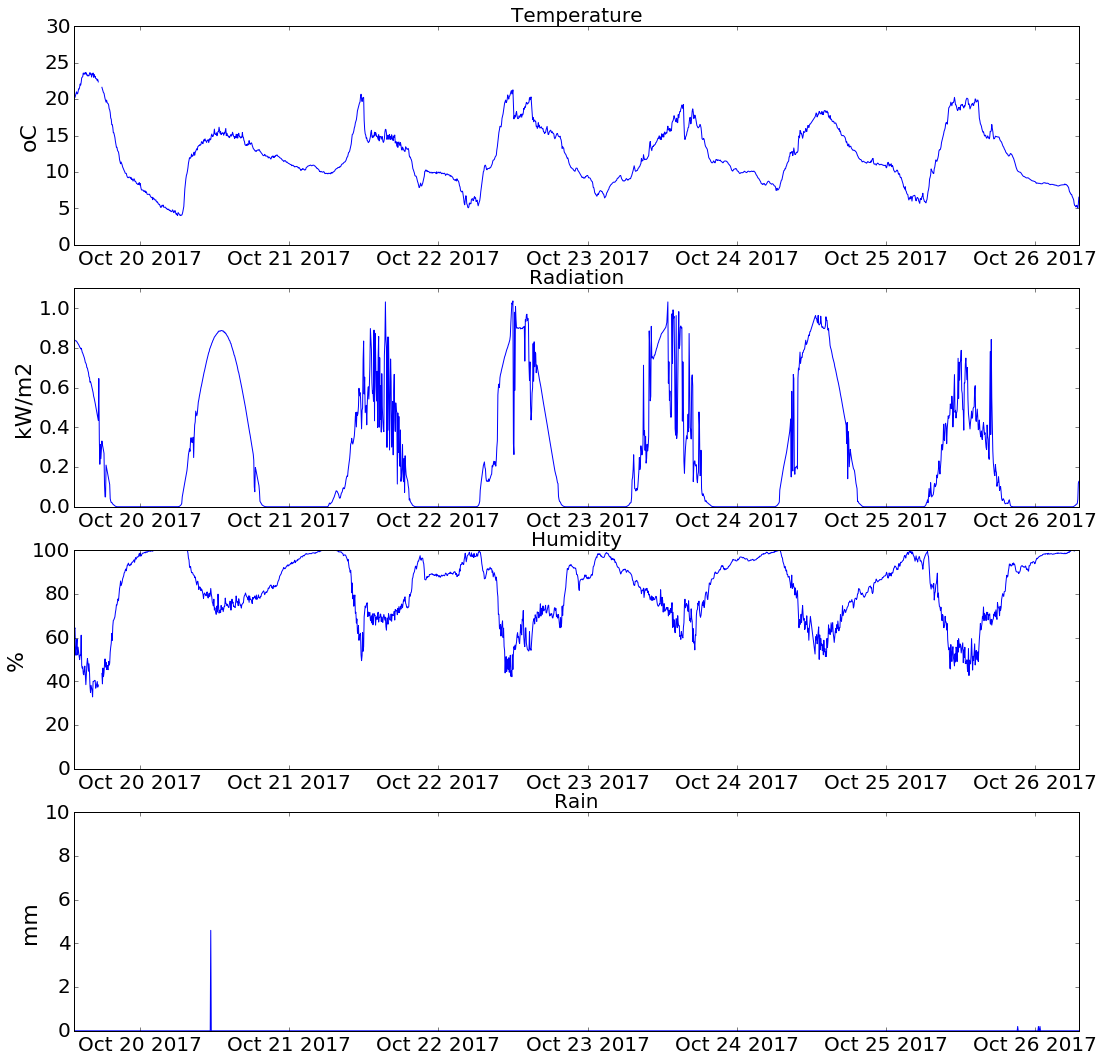

In [27]:
MetGraph = plt.figure(figsize=(18,18))
TempPannel = MetGraph.add_subplot(4,1,1)
plt.plot(MidMetData.ix[Start:,'AirTemp'])
plt.title('Temperature',fontsize=20)
plt.ylabel('oC',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,30)
RadnPannel = MetGraph.add_subplot(4,1,2)
plt.plot(MidMetData.ix[Start:,'RadnkW'])
plt.title('Radiation',fontsize=20)
plt.ylabel('kW/m2',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,1.100)
HumidityPannel = MetGraph.add_subplot(4,1,3)
plt.plot(MidMetData.ix[Start:,'RelativeHumidity'])
plt.title('Humidity',fontsize=20)
plt.ylabel('%',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,100)
RainfallPannel = MetGraph.add_subplot(4,1,4)
plt.plot(MidMetData.ix[Start:,'Rain'])
plt.title('Rain',fontsize=20)
plt.ylabel('mm',fontsize=22)
plt.tick_params(labelsize=20)
plt.ylim(0,10)

In [28]:
Daylight = (MidMetData.RadnkW > 0.00002) & (MidMetData.index > '2017-10-15')

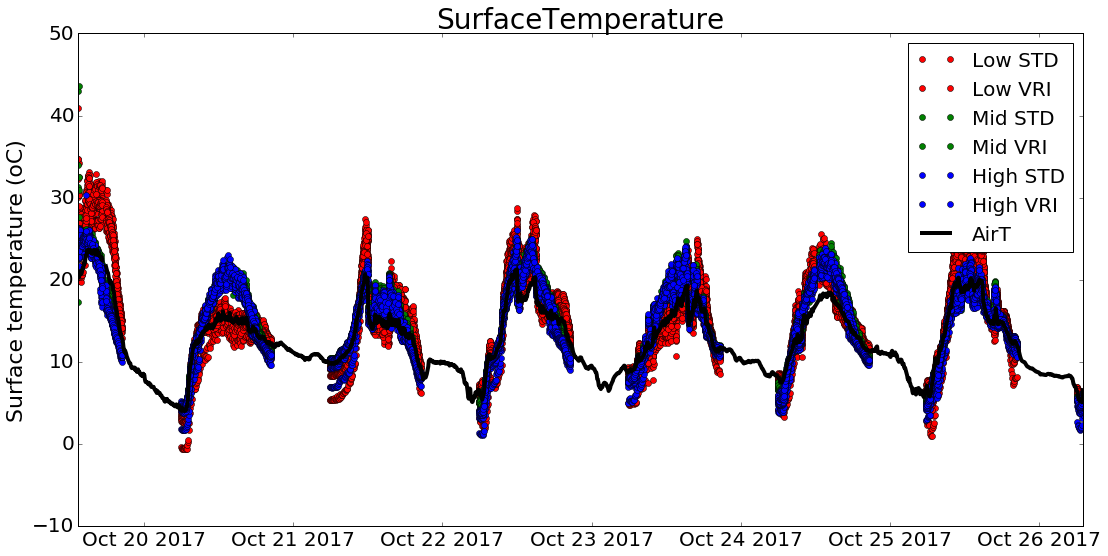

In [29]:
Graph = plt.figure(figsize=(18,30))
pos = 0
Fig = Graph.add_subplot(3,1,1)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = SurfaceTemp.ix[Daylight,(Zone,Irr)]
        plt.plot(data,'o',color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),'o',color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot(MidMetData.ix[Start:,'AirTemp'],color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)

## Bring in the albedo and cover data

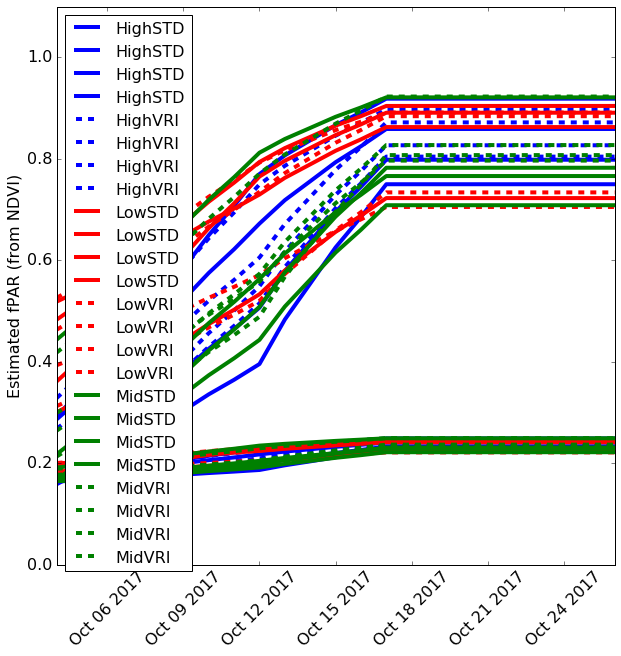

In [30]:
Albedo = pd.read_pickle('Albedo.pkl')
fPAR = pd.read_pickle('fPAR.pkl')

NDVIGraph = plt.figure(figsize=(10,10))
Irrigs = ['STD', 'VRI',] 
fills = ['b','w','r','w','g','w']
lines = ['-','--','-','--','-','--']
Zones = ['High', 'Low', 'Mid']
edges = ['b','b','r','r','g','g']
Reps = [1.0, 2.0, 3.0, 4.0]
pos = -1
for Zone in Zones:
    for Irrig in Irrigs:
        pos+=1
        plt.plot(Albedo.index,Albedo.ix[:,(Zone,Irrig)],lines[pos],color=edges[pos],label=Zone+Irrig,lw=4)
        plt.plot(fPAR.index,fPAR.ix[:,(Zone,Irrig)],lines[pos],color=edges[pos],label='_nolegend_',lw=4)
plt.ylabel('Estimated fPAR (from NDVI)',fontsize=16)
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
plt.ylim(0,1.1)
plt.legend(loc=2,fontsize=16)

## Calculate daily values for input data

In [31]:
Ta = MidMetData.loc[Daylight,'AirTemp'].dropna().resample('d').mean()
RH = MidMetData.loc[Daylight,'RelativeHumidity'].dropna().resample('d').mean()
Rs = MidMetData.loc[Daylight,'RadnMJ'].dropna().resample('d').sum()
Es = [et.saturated_vapor_pressure(Ta[x])/10 for x in range(Ta.index.size)] #in kPa
Eo = Es* RH/100
Ed = Es - Eo
Ts = SurfaceTemp.loc[Daylight,:].dropna().resample('d').mean()

## Derive Radiation variables from measured data

In [32]:
et.ExtraterestialRadiation(Lattitude,
                                                            333,
                                                            24,
                                                            0,
                                                            LongitudeTZ,
                                                            LongitudeML)

43.47834222372987

In [33]:
et.ClearSkyRadiation(Lattitude,
                                                            333,
                                                            24,
                                                            0,
                                                            LongitudeTZ,
                                                            LongitudeML)

32.62353930415347

In [34]:
et.NetRadiation(30.78,
                     6.5,
                     0.5,
                     -43.38,
                     333,
                     24,
                     24,
                     LongitudeTZ,
                     LongitudeML,
                     0.23) 

17.02414186845565

In [35]:
# Calculate net radiation (Rn)
Rn = pd.DataFrame(index=Rs.index,columns=Albedo.columns)
for plot in Rn.columns:
    Rn.ix[:,plot] = [et.NetRadiation(Rs[x],
                     Ta[x],
                     Eo[x],
                     Lattitude,
                     x.dayofyear,
                     24,
                     12,
                     LongitudeTZ,
                     LongitudeML,
                     Albedo.ix[x,plot]) for x in Rn.index]  
#Calculate some other Radn variables for sense checking
Rn.ix[:,('Rex','Expt','Expt')] = [et.ExtraterestialRadiation(Lattitude,
                                                            x.dayofyear,
                                                            24,
                                                            0,
                                                            LongitudeTZ,
                                                            LongitudeML) for x in Rn.index]

Rn.ix[:,('Rso','Expt','Expt')] = [et.ClearSkyRadiation(Lattitude,
                                                            x.dayofyear,
                                                            24,
                                                            0,
                                                            LongitudeTZ,
                                                            LongitudeML) for x in Rn.index]
Rn.ix[:,'Rs'] = Rs

# Calculate ground heat flux    
def GroundHeatFlux(Rs,fPAR,Ta):
    return -0.71 + 0.21*Rs*(1-fPAR)+0.07*Ta

G = pd.DataFrame(index=Rs.index,columns=Albedo.columns)
for plot in G.columns:
    G.ix[:,plot] = [GroundHeatFlux(Rs[x],
                                   fPAR.ix[x,plot],
                                   Ta[x]) for x in G.index]

Rn_less_G = Rn - G 

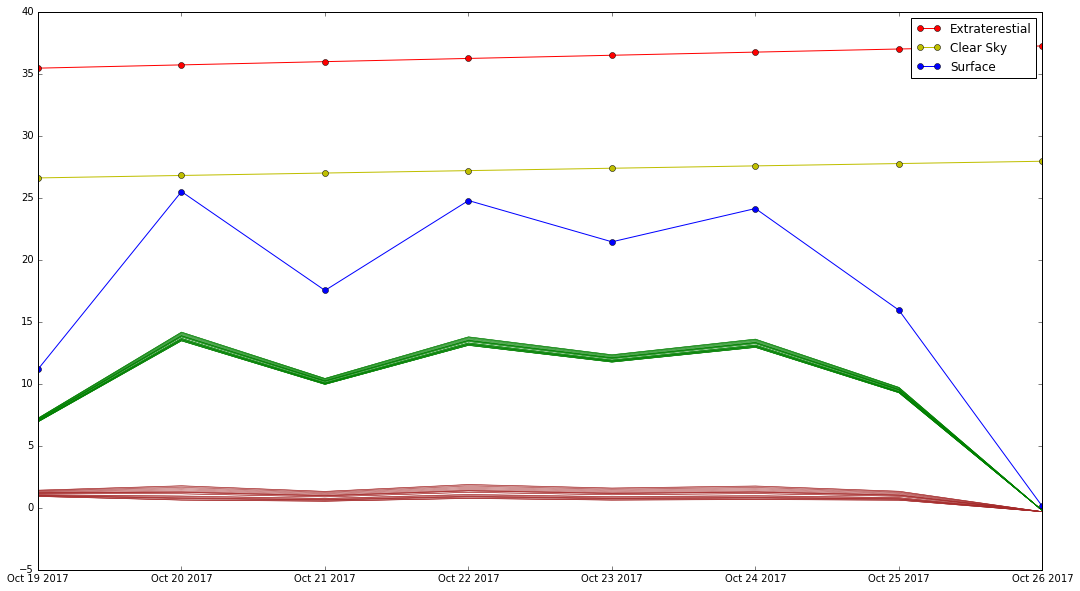

In [36]:
figure = plt.figure(figsize=(18,10))
plt.plot(Rn.ix[:,'Rex'],'-o',color='r',label='Extraterestial')
plt.plot(Rn.ix[:,'Rso'],'-o',color='y',label='Clear Sky')
plt.plot(Rn.ix[:,'Rs'],'-o',color='b',label='Surface')
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = Rn.ix[:,(Zone,Irr)]
        plt.plot(data,color = 'g',lw=0.5,label = '_nolegend_')
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = G.ix[:,(Zone,Irr)]
        plt.plot(data,color = 'brown',lw=0.5,label = '_nolegend_')
plt.legend()

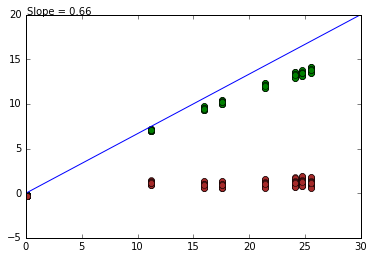

In [37]:
pos=0
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        plt.plot(Rn.ix[:,'Rs'],Rn.ix[:,(Zone,Irr)],'o',color = 'green',lw=0.5,label = '_nolegend_')
        plt.plot(Rn.ix[:,'Rs'],G.ix[:,(Zone,Irr)],'o',color = 'brown',lw=0.5,label = '_nolegend_')
        pos +=1
plt.plot([0,30],[0,20],'-')
plt.text(0.1,20,'Slope = 0.66')

## Calculate temperature variables from measured data

In [38]:
#Calculate aerodynamic temperature
To = pd.DataFrame(index = Ts.index,columns=Ts.columns)
for date in To.index:
    To.ix[date,:] = Ts.ix[date,:] - Ed[date]
    
#Calculate temperature difference
Td = pd.DataFrame(index = To.index, columns = To.columns)
for date in Td.index:
    Td.ix[date,:] = To.ix[date,:] - Ta[date]
    
#Calculate alpha
def AlphaCoeff(Td,fPAR):
    CoverFact = 0.1+1.6*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    return 1/(0.68 + 0.18*Td ) * CoverFact

Alpha = pd.DataFrame(index = Td.index, columns = Td.columns)
for plot in Alpha.columns:
    Alpha.ix[:,plot] = [AlphaCoeff(Td.ix[x,plot],
                                   fPAR.ix[x,plot]) for x in Alpha.index]

#Estimate Water Use by surfaces
E = pd.DataFrame(index= Alpha.index, columns=Alpha.columns)
for plot in E.columns:
    E.ix[:,plot] = [et.Priestly_TaylorEO(Rn_less_G.ix[x,plot],
                                         Ta[x],
                                         Alpha.ix[x,plot],
                                         'net') for x in E.index]

## Take a look at some of the daily data

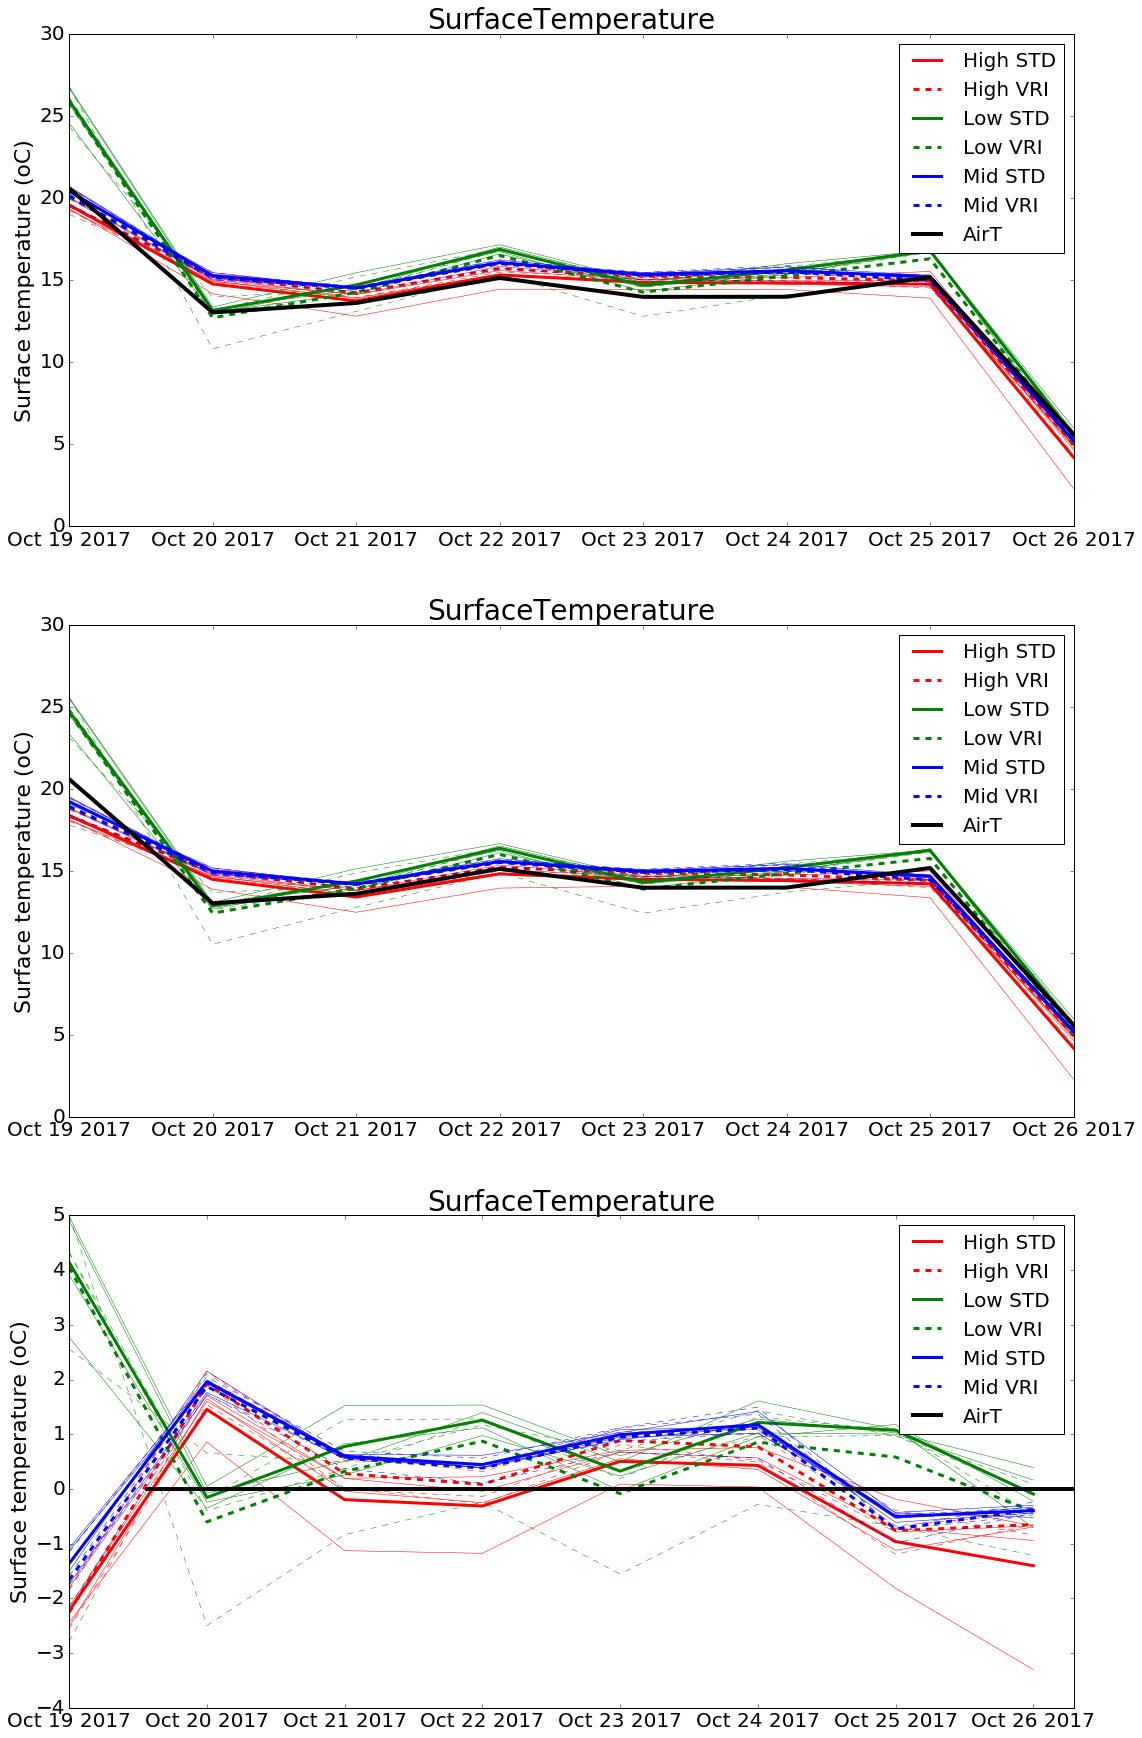

In [39]:
Graph = plt.figure(figsize=(18,30))
pos = 0
Fig = Graph.add_subplot(3,1,1)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = Ts.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),lines[pos],color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot(Ta,color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)
pos=0
Fig = Graph.add_subplot(3,1,2)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = To.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),lines[pos],color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot(Ta,color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)
pos=0
Fig = Graph.add_subplot(3,1,3)
for Zone in Zones:
    for Irr in Irrigs:
        lab = Zone + ' ' + Irr
        data = Td.ix[:,(Zone,Irr)]
        plt.plot(data,lines[pos],color = colors[pos],lw=0.5,label = '_nolegend_')
        plt.plot(data.index,data.mean(axis=1),lines[pos],color = colors[pos],lw=3,label = lab)
        pos +=1
plt.plot([MidMetData.ix[Start:,'AirTemp'].index.min(),MidMetData.index.max()],[0,0],color='k',lw=4,label='AirT')
Fig.legend(fontsize=20)
plt.title('SurfaceTemperature',fontsize=28)
plt.tick_params(labelsize=20)
plt.ylabel('Surface temperature (oC)',fontsize = 22)

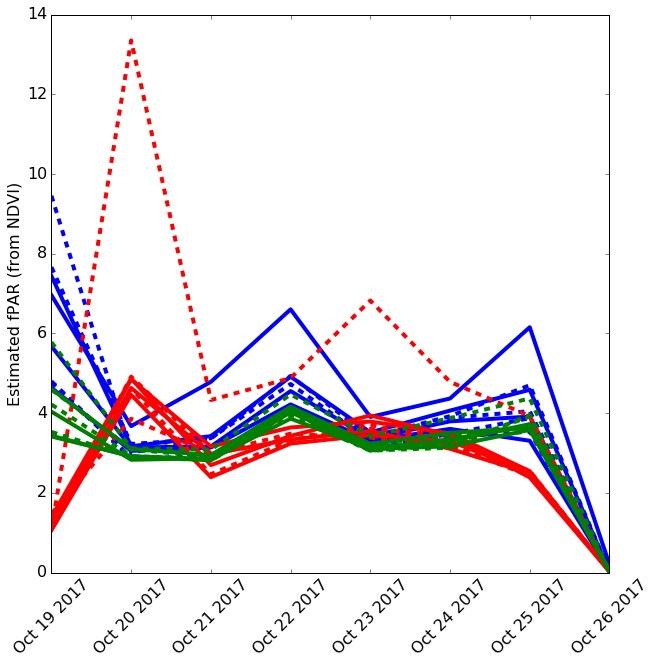

In [40]:
EGraph = plt.figure(figsize=(10,10))
Irrigs = ['STD', 'VRI',] 
fills = ['b','w','r','w','g','w']
lines = ['-','--','-','--','-','--']
Zones = ['High', 'Low', 'Mid']
edges = ['b','b','r','r','g','g']
Reps = [1.0, 2.0, 3.0, 4.0]
pos = -1
for Zone in Zones:
    for Irrig in Irrigs:
        pos+=1
        plt.plot(E.index,E.ix[:,(Zone,Irrig)],lines[pos],color=edges[pos],label=Zone+Irrig,lw=4)
        plt.ylabel('Estimated fPAR (from NDVI)',fontsize=16)
plt.xticks(rotation=45)
plt.tick_params(labelsize=16)
#plt.ylim(0,1.1)
#plt.legend(loc=2,fontsize=16)

In [41]:
E.High

Irrig            STD                                     VRI            \
Rep                1         2         3         4         1         2   
2017-10-19  6.959271  5.677770  7.439039  4.636133  7.663590  4.797819   
2017-10-20  3.675140  3.138140  3.167314  3.052179  3.226053  2.881543   
2017-10-21  4.783706  3.163103  3.422978  3.136596  3.358070  2.879223   
2017-10-22  6.603590  4.552801  4.915254  4.217750  4.933126  4.174367   
2017-10-23  3.904535  3.361720  3.518123  3.310790  3.403658  3.137200   
2017-10-24  4.366344  3.793614  4.063041  3.603408  3.923539  3.475238   
2017-10-25  6.155100  3.912845  4.585053  3.306597  4.699696  3.873482   
2017-10-26  0.205549  0.034298  0.031906  0.031196  0.031379  0.029218   

Irrig                           
Rep                3         4  
2017-10-19  9.453218  4.772712  
2017-10-20  3.006338  2.850604  
2017-10-21  3.372242  2.925740  
2017-10-22  4.730299  4.049200  
2017-10-23  3.300659  3.106165  
2017-10-24  3.881018  3.393981  
2017-10-25  4.049050  3.536311  
2017-10-26  0.031559  0.033168

In [42]:
def calcTime(DateTimeOfInterest):
    When = DateTimeOfInterest.to_pydatetime()
    zerohour =  datetime.datetime(When.year, When.month, When.day, 0, 0)
    _hour = When - zerohour
    Hour = float(_hour.seconds)/3600
    _ret = 0
    if Hour >1:
        _ret = Hour-1
    else:
        _ret = 23 + Hour
    return _ret

In [43]:
Date = '2017-10-20'
IndexDate = MidMetData.ix[Date,:].index
print(np.sum([et.NetRadiation(MidMetData.ix[x,'RadnMJ'],
                 MidMetData.ix[x,'AirTemp'],
                 MidMetData.ix[x,'Eo'],
                 -43.38,
                 333,
                 0.083333,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML,
                 0.23) for x in IndexDate]))
print(et.NetRadiation(MidMetData.ix[Date,'RadnMJ'].sum(),
                 MidMetData.ix[Date,'AirTemp'].max(),
                 MidMetData.ix[Date,'Eo'].max(),
                 -43.38,
                 333,
                 24,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML,
                 0.23))

17.4839380063
15.432505209


In [44]:
Date = '2017-10-20'
IndexDate = MidMetData.ix[Date,:].index
print(np.sum([et.ExtraterestialRadiation(-43.38,
                 333,
                 0.083333,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML) for x in IndexDate]))
print(et.ExtraterestialRadiation(-43.38,
                 333,
                 24,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML))

43.2231864976
43.4783422237


In [45]:
Date = '2017-10-20'
IndexDate = MidMetData.ix[Date,:].index
print(np.sum([et.ClearSkyRadiation(-43.38,
                 333,
                 0.083333,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML) for x in IndexDate]))
print(et.ClearSkyRadiation(-43.38,
                 333,
                 24,
                 calcTime(x),
                 LongitudeTZ,
                 LongitudeML))

32.4320857566
32.6235393042
